In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
import math
picL = 18333
picR = 18158
FrameLSum = pims.ImageSequence('./frame_{}_white.tif'.format(picL))
FrameRSum = pims.ImageSequence('./frame_{}_white.tif'.format(picR))
TrackL = pd.read_csv('ImageJ_L.csv')
TrackR = pd.read_csv('ImageJ_R.csv')
TrackL['POSITION_X'] = TrackL['POSITION_X']*100
TrackR['POSITION_X'] = TrackR['POSITION_X']*100
TrackL['POSITION_Y'] = TrackL['POSITION_Y']*100
TrackR['POSITION_Y'] = TrackR['POSITION_Y']*100
TrackL['Time'] = TrackL['FRAME']*0.0001
TrackR['Time'] = TrackR['FRAME']*0.0001
TrackL.columns

Index([u' ', u'Label', u'ID', u'TRACK_ID', u'QUALITY', u'POSITION_X',
       u'POSITION_Y', u'POSITION_Z', u'POSITION_T', u'FRAME', u'RADIUS',
       u'VISIBILITY', u'MANUAL_COLOR', u'MEAN_INTENSITY', u'MEDIAN_INTENSITY',
       u'MIN_INTENSITY', u'MAX_INTENSITY', u'TOTAL_INTENSITY',
       u'STANDARD_DEVIATION', u'ESTIMATED_DIAMETER', u'CONTRAST', u'SNR',
       u'Time'],
      dtype='object')

In [2]:
TrackL.head()

,,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,...,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR,Time
0,1,ID481095,481095,0,26.103,292.8,142.1,0,0,0,...,186.0,201,91,255,930,74.391,0.001,0.049,0.232,0.0000
1,2,ID481253,481253,0,25.671,292.5,140.9,0,1,1,...,171.2,255,0,255,856,119.173,0.001,0.065,0.176,0.0001
2,3,ID481203,481203,0,27.446,292.2,140.3,0,2,2,...,185.8,237,36,255,929,95.161,0.001,0.049,0.182,0.0002
3,4,ID481357,481357,0,26.827,292.3,139.7,0,3,3,...,163.8,255,18,255,819,125.043,0.001,0.075,0.182,0.0003
4,5,ID481302,481302,0,30.346,292.2,138.9,0,4,4,...,196.8,219,73,255,984,75.520,0.001,0.038,0.193,0.0004


In [3]:
#TL1 = TrackL[TrackL['FRAME']==110]
#plt.figure(figsize=(12,12))
#plt.plot(TL1['STANDARD_DEVIATION'],TL1['TRACK_ID'])
#plt.plot(TL1['QUALITY'],TL1['TRACK_ID'])
#plt.plot(TL1['MEAN_INTENSITY'],TL1['TRACK_ID'])
#plt.show()

In [4]:
TrackL['TRACK_ID'].unique()

array([   0,    1,    2, ..., 1575, 1576, 1577])

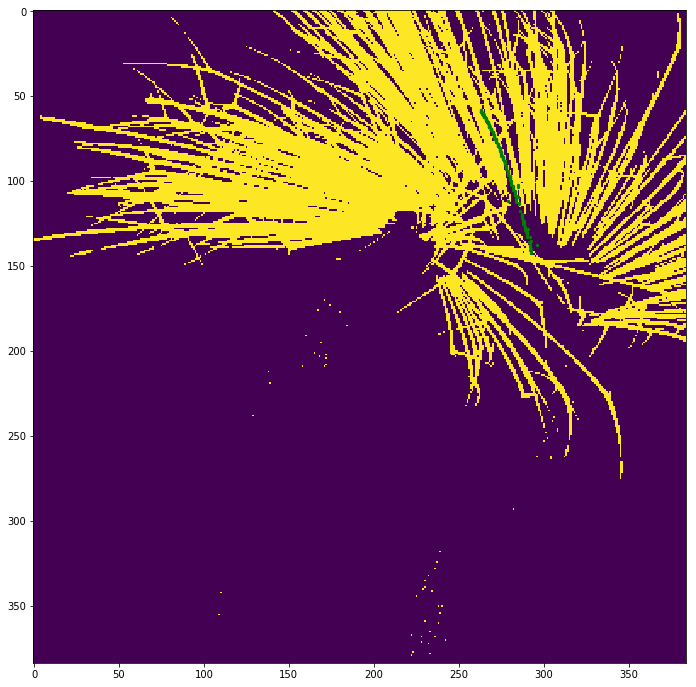

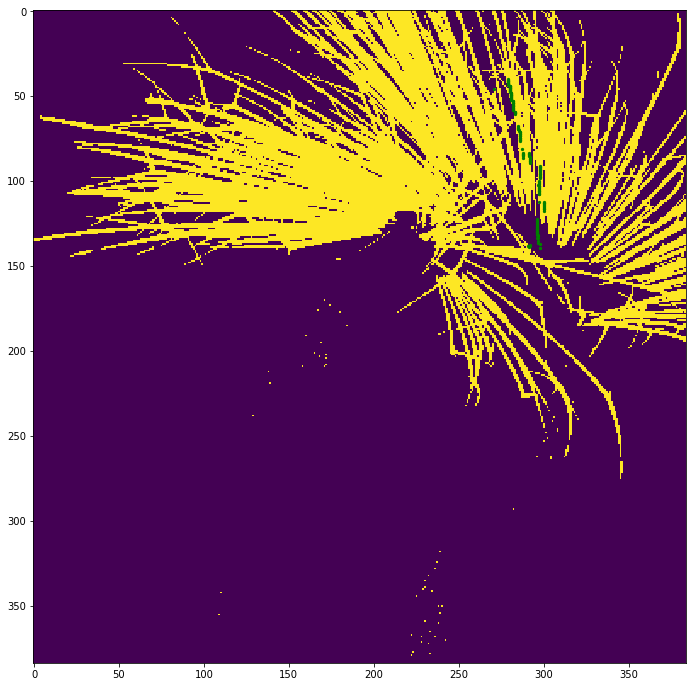

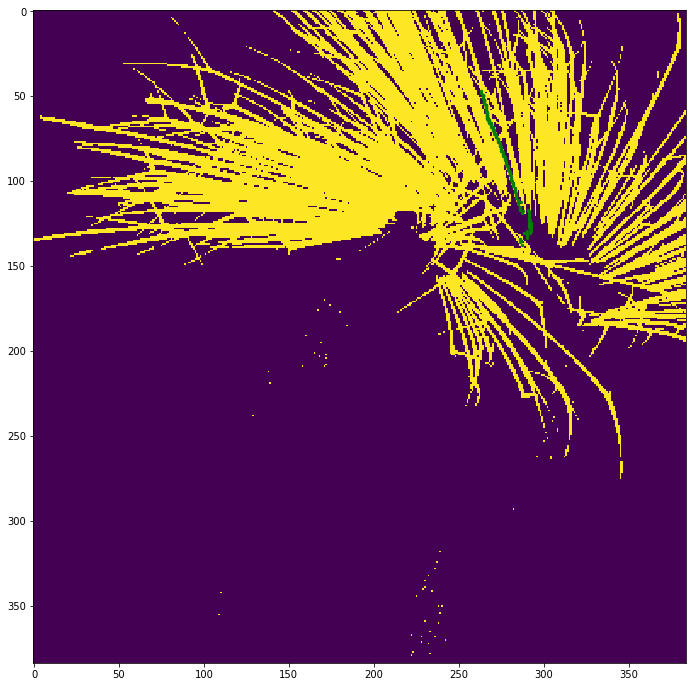

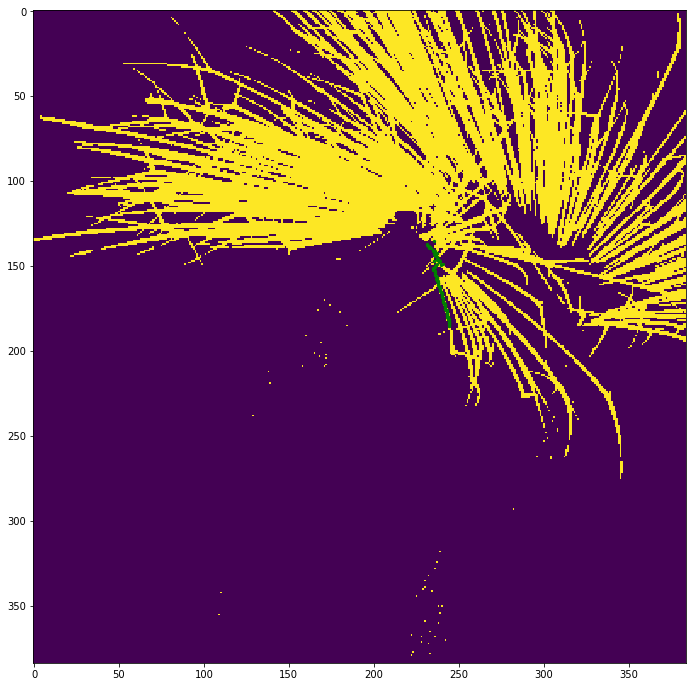

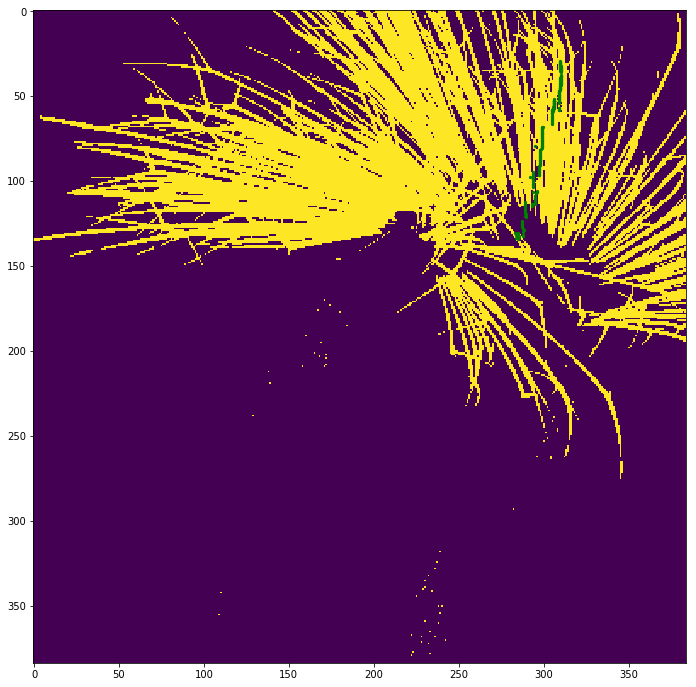

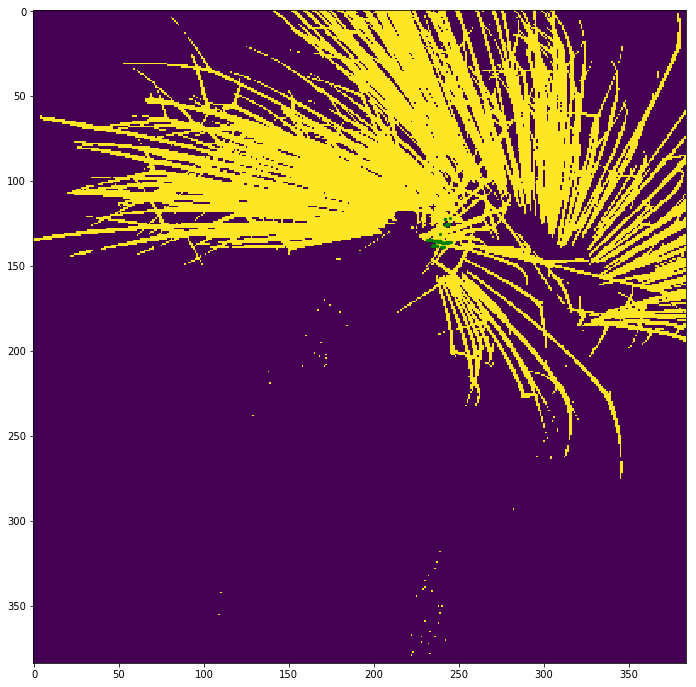

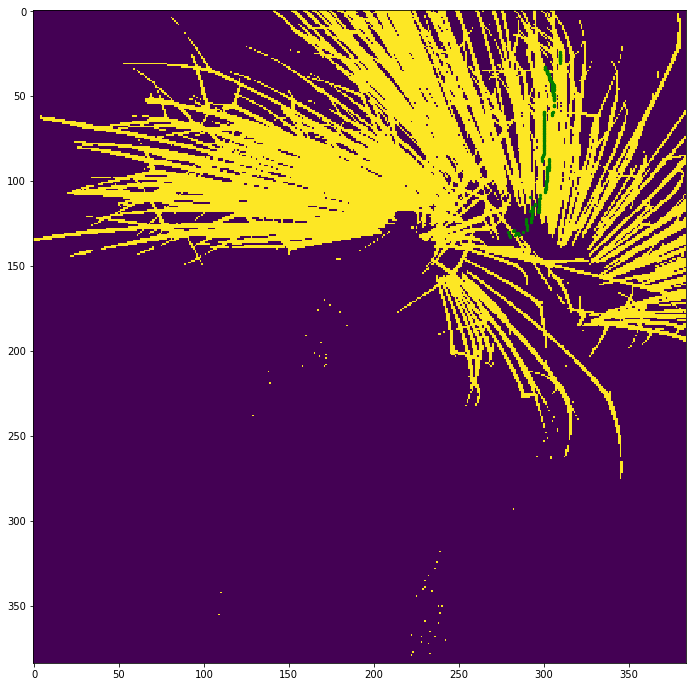

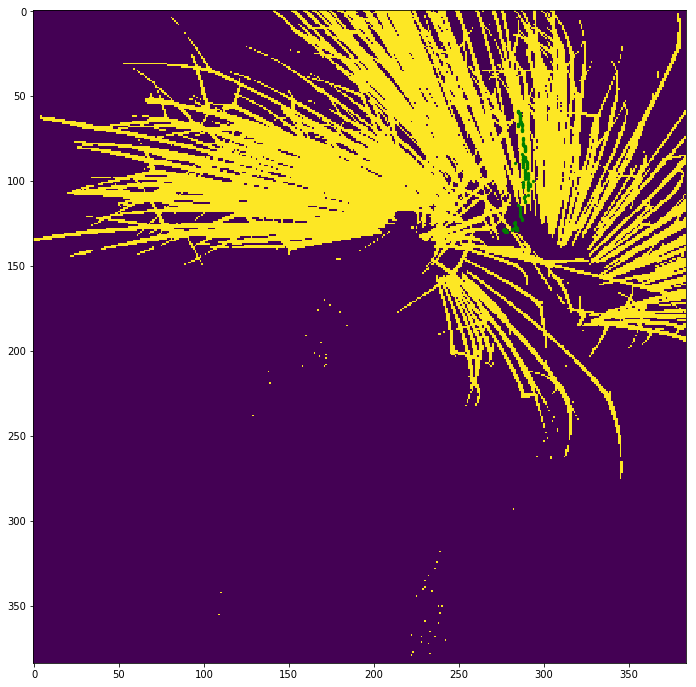

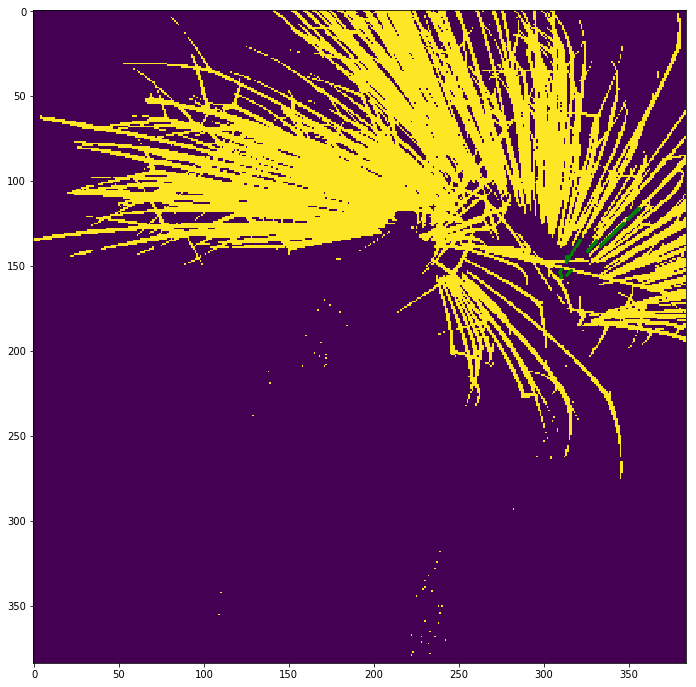

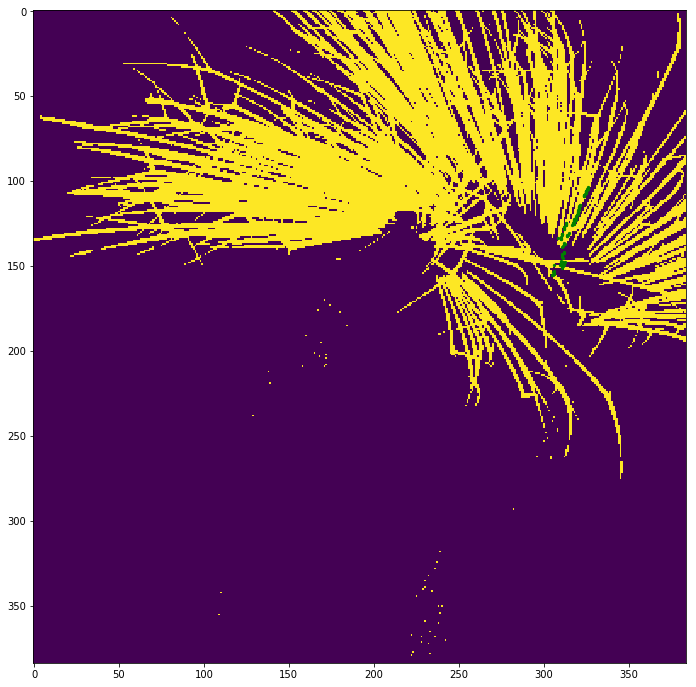

In [5]:
for ii in range(10):
#for ii in TrackL['TRACK_ID'].unique():
    TL1 = TrackL[TrackL['TRACK_ID'] == ii]
    XL = TL1['POSITION_X']
    YL = TL1['POSITION_Y']
    TL = TL1['Time']
    AL = TL1['MEAN_INTENSITY']
    
    plt.figure(figsize=(12,12))
    plt.imshow(FrameLSum[0])    
    plt.scatter(XL,YL,s=5,c='g')
    plt.savefig('trackL_{}.tif'.format(ii))
    plt.show() 

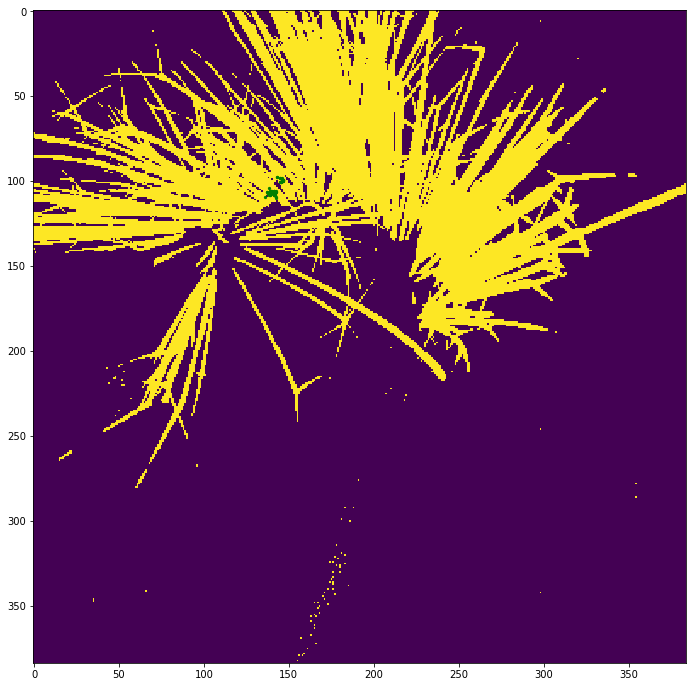

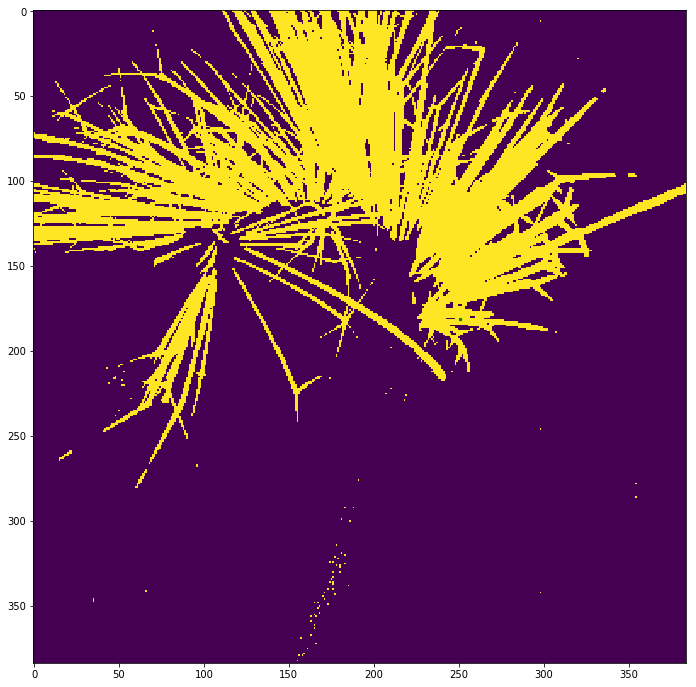

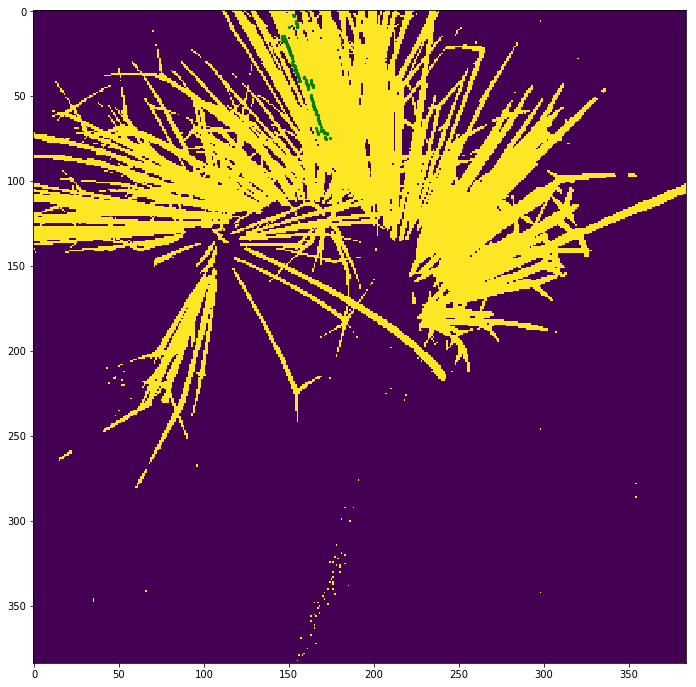

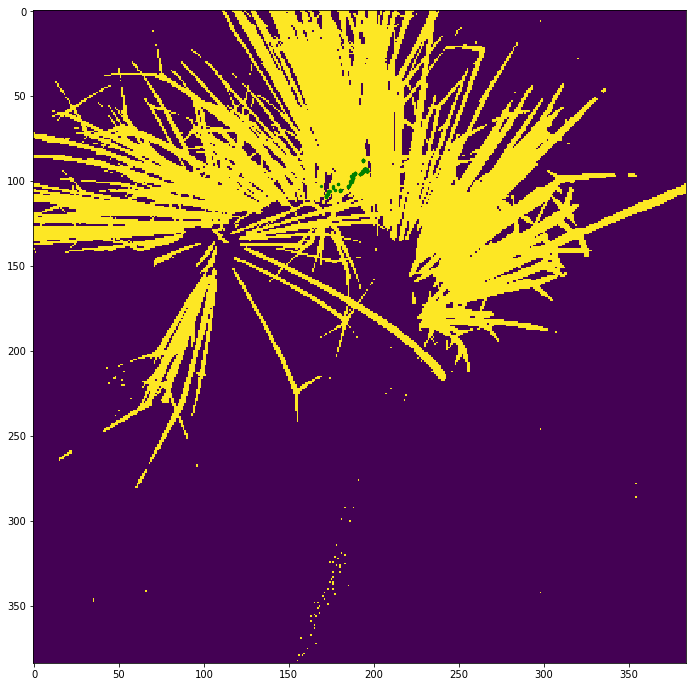

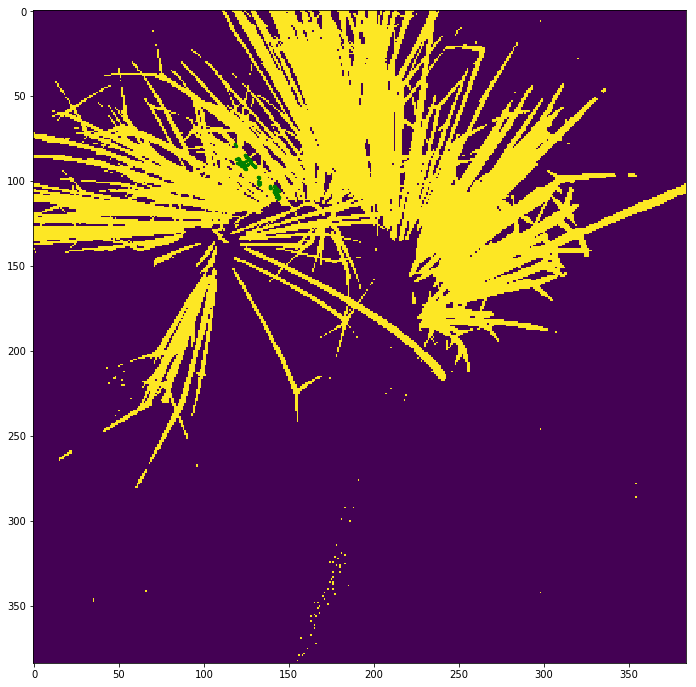

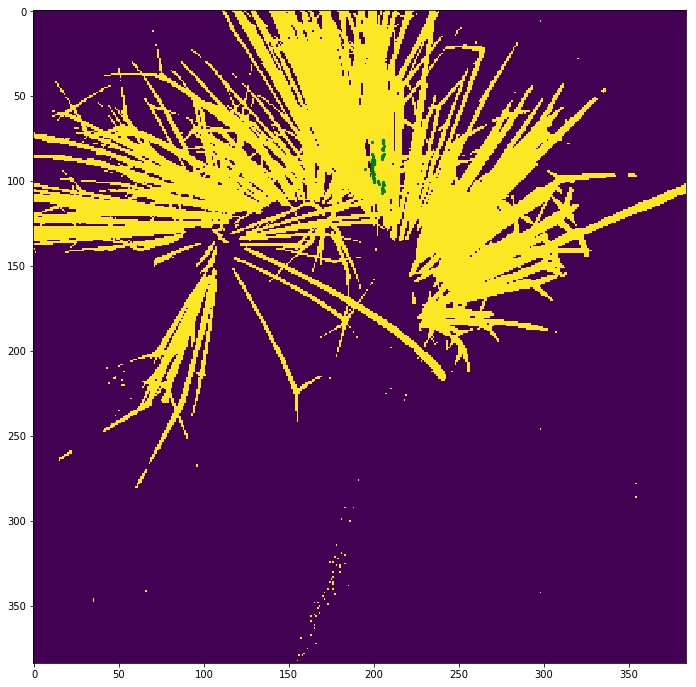

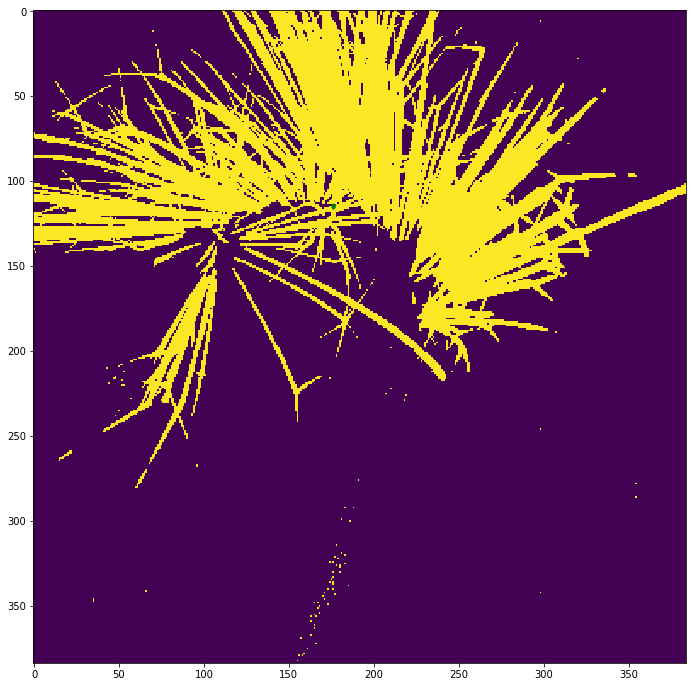

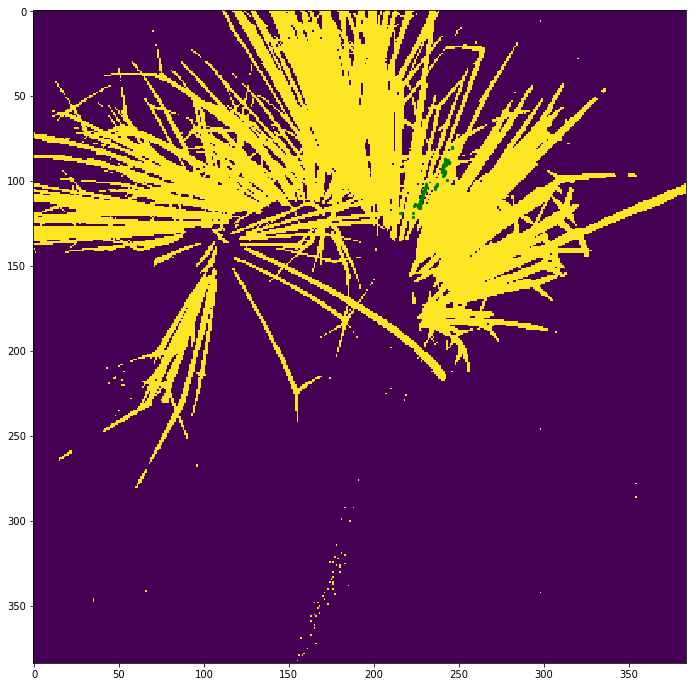

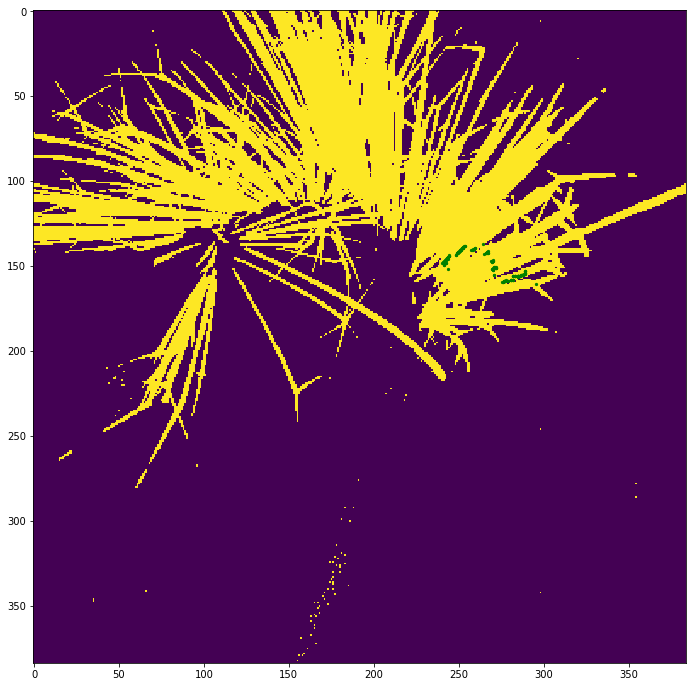

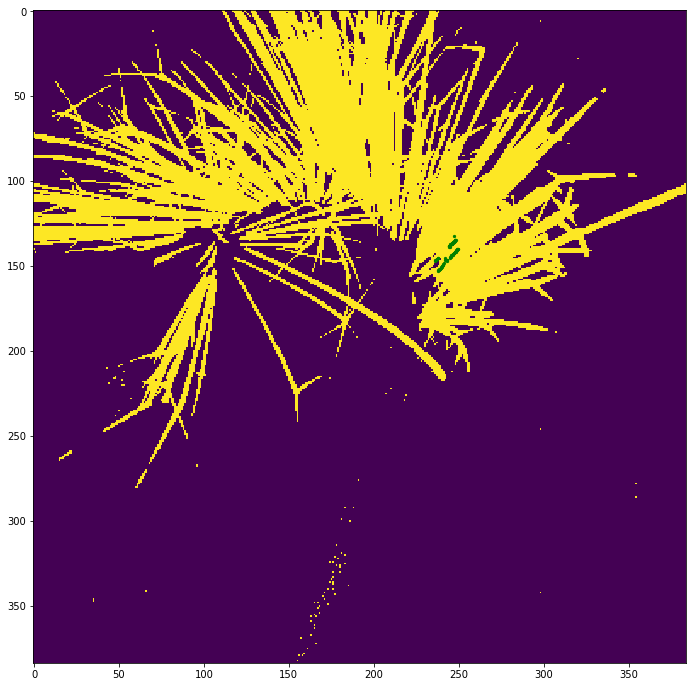

In [6]:
for ii in range(300,310):
#for ii in TrackR['TRACK_ID'].unique():
    TR1 = TrackR[TrackR['TRACK_ID'] == ii]
    XR = TR1['POSITION_X']
    YR = TR1['POSITION_Y']
    TR = TR1['Time']
    AR = TR1['MEAN_INTENSITY']
    
    plt.figure(figsize=(12,12))
    plt.imshow(FrameRSum[0])    
    plt.scatter(XR,YR,s=5,c='g')
    plt.savefig('trackR_{}.tif'.format(ii))
    plt.show() 

In [7]:
TR1 = TrackR[TrackR['TRACK_ID'] == 300]

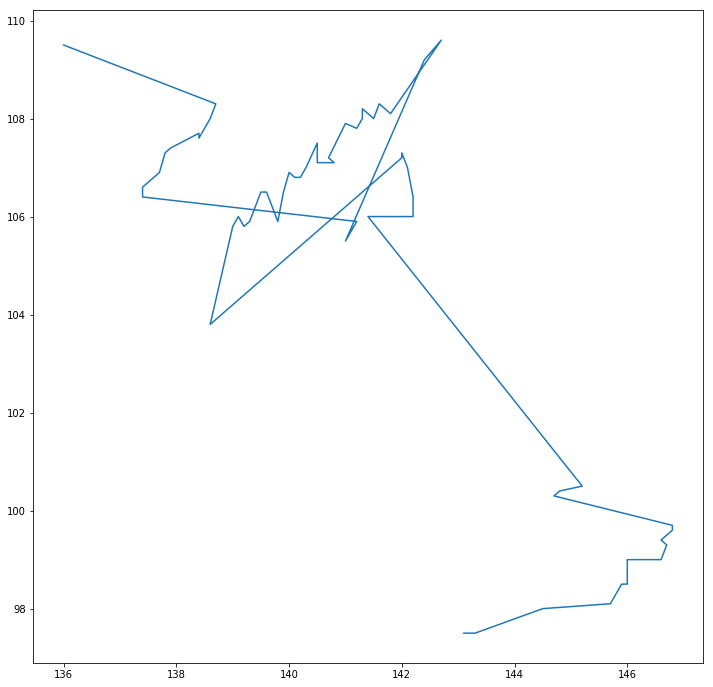

In [8]:
plt.figure(figsize=(12,12))
plt.plot(TR1['POSITION_X'],TR1['POSITION_Y'])
plt.show()